<a href="https://colab.research.google.com/github/ronsuitNES23/ronsuitNES23/blob/main/Sale_Drivers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connecting to Libraries

In [1]:
%cd /content/drive/MyDrive/Statistics and Descriptive Analytics/Multilinear Regression

/content/drive/MyDrive/Statistics and Descriptive Analytics/Multilinear Regression


## Loading Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Loadind Data and Exploration

In [3]:
df = pd.read_csv('Clothing.csv')
df.head(5)

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
0,750000,4411.765,41.0,1.0,1.0000,1.0000,1.5357,76,16.75596,17166.67,27177.04,170,41.0
1,1926395,4280.878,39.0,2.0,2.0000,3.0000,1.5357,192,22.49376,17166.67,27177.04,450,39.0
2,1250000,4166.667,40.0,1.0,2.0000,2.2222,1.4091,114,17.19120,292857.20,71570.55,300,40.0
3,694227,2670.104,40.0,1.0,1.0000,1.2833,1.3673,100,21.50260,22207.04,15000.00,260,40.0
4,750000,15000.000,44.0,2.0,1.9556,1.2833,1.3673,104,15.74279,22207.04,10000.00,50,44.0


In [4]:
df.describe()

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000
mean,8.335842e+05,6334.751278,38.774230,1.283796,2.069384,1.565539,1.389747,121.137500,18.955044,5.825726e+04,27829.217000,151.050000,42.808462
std,5.834638e+05,3739.343624,5.218184,0.639773,1.015598,0.705999,0.394514,64.435343,7.343363,1.075588e+05,41501.943418,112.498254,13.296070
min,5.000000e+04,300.000000,16.000000,1.000000,1.000000,1.000000,1.000000,32.000000,5.707966,1.000000e+03,350.000000,16.000000,16.000000
25%,4.953400e+05,3904.200000,37.000000,1.000000,1.923100,1.283300,1.333300,80.000000,13.541198,2.000000e+04,10000.000000,80.000000,37.000000
50%,6.942270e+05,5278.935000,39.000000,1.000000,1.955600,1.283300,1.367300,104.000000,17.744585,2.220704e+04,22859.850000,120.000000,40.000000
75%,9.768170e+05,7739.899250,41.000000,1.295225,2.066400,2.000000,1.367300,145.250000,24.302982,6.226923e+04,22859.850000,190.000000,42.000000
max,5.000000e+06,27000.000000,66.000000,10.000000,8.000000,9.000000,4.000000,582.000000,43.326020,1.500000e+06,400000.000000,1214.000000,90.000000


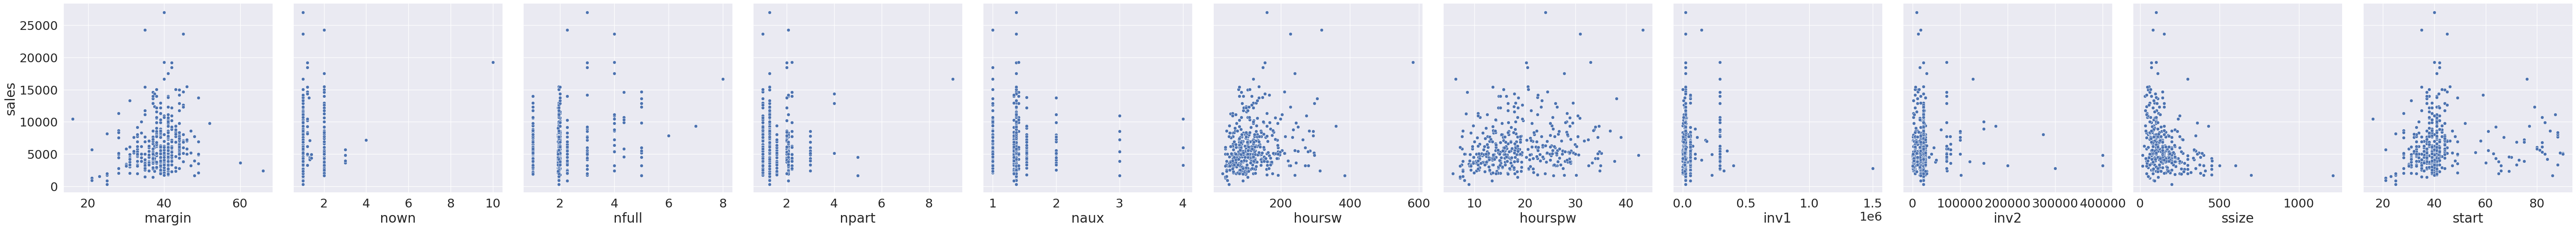

In [5]:
#plotting a graph to check for outliers (continuous IV against DV)
sns.set(font_scale = 2)
sns.pairplot(data= df,
             y_vars= ['sales'],
             x_vars= ['margin', 'nown', 'nfull', 'npart', 'naux', 'hoursw', 'hourspw', 'inv1', 'inv2', 'ssize', 'start'],
             height= 6)

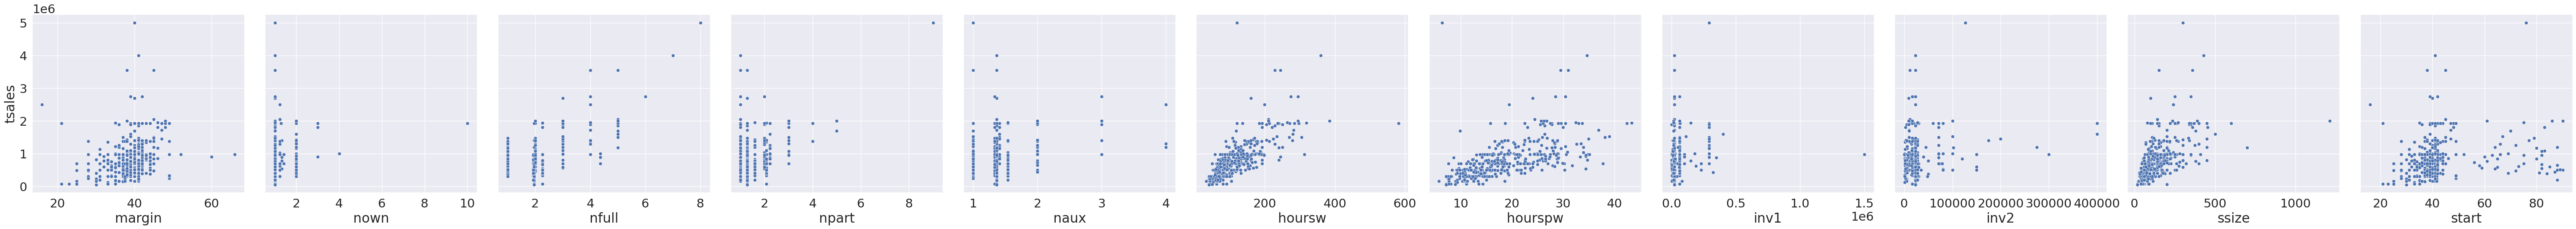

In [6]:
sns.set(font_scale = 2)
sns.pairplot(data= df,
             y_vars= ['tsales'],
             x_vars= ['margin', 'nown', 'nfull', 'npart', 'naux', 'hoursw', 'hourspw', 'inv1', 'inv2', 'ssize', 'start'],
             height= 6)

In [7]:
corr_matrix = df[['tsales', 'margin', 'hoursw', 'hourspw', 'inv1', 'inv2', 'ssize', 'start']]

<Axes: >

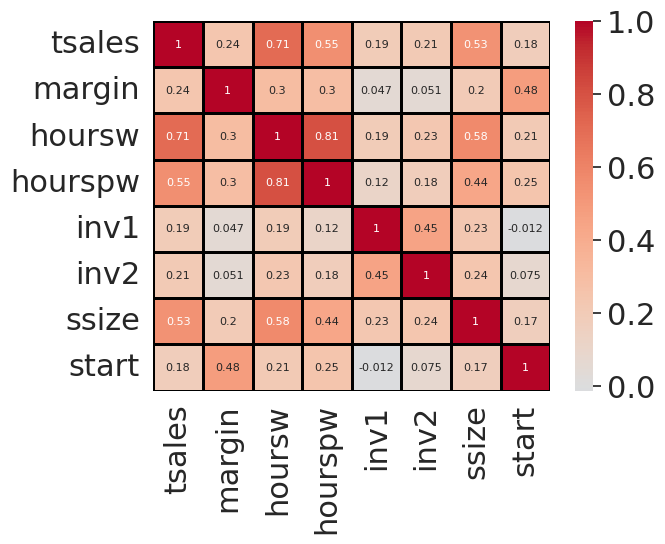

In [8]:
sns.heatmap(corr_matrix.corr(),
            annot= True,
            fmt = '.2g',
            center= 0,
            cmap= 'coolwarm',
            linewidths= 1,
            linecolor= 'black',
            annot_kws={"size": 8}
          )

## Multilinear Regression

In [9]:
# isolating the x and y
y= df['tsales']/1000
x = df.drop(columns=[ 'hourspw', 'tsales', 'nown', 'npart', 'naux', 'sales', 'hoursw'])

In [10]:
# adding the constant
x = sm.add_constant(x)
x.head(2)

,const,margin,nfull,inv1,inv2,ssize,start
0,1.0,41.0,1.0,17166.67,27177.04,170,41.0
1,1.0,39.0,2.0,17166.67,27177.04,450,39.0


In [11]:
# Training and Test Splitting
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                    test_size = 0.2,
                                    random_state = 1502)
x_train.head()


,const,margin,nfull,inv1,inv2,ssize,start
201,1.0,42.0,2.0000,22207.04,400000.00,400,42.0
25,1.0,35.0,2.0000,62269.23,20000.00,160,35.0
94,1.0,39.0,1.9556,22207.04,22859.85,200,39.0
346,1.0,47.0,3.0000,292857.20,200000.00,450,47.0
121,1.0,37.0,2.0000,22207.04,1200.00,350,37.0


In [12]:
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 tsales   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     42.16
Date:                Tue, 22 Aug 2023   Prob (F-statistic):           1.40e-37
Time:                        16:11:34   Log-Likelihood:                -2389.5
No. Observations:                 320   AIC:                             4793.
Df Residuals:                     313   BIC:                             4819.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -459.4076    179.383     -2.561      0.0

## Accuracy Assessment

In [13]:
predictions = model.predict(x_test)
predictions[:4]

270    2618.567324
380     541.306182
326     730.620970
60      674.666248
dtype: float64

In [14]:
print(f'MAE: {mean_absolute_error(y_test, predictions).round(1)}')
print(f'RSME: {np.sqrt(mean_squared_error(y_test, predictions)).round(1)}')

MAE: 333.7
RSME: 449.7
